JIPSA CHELORA VEETIL

Iris Flowers Classification Project

Project idea – The iris flowers have different species and you can distinguish them based on the length of petals and sepals.
This is a basic project for machine learning beginners to predict the species of a new iris flower.
Dataset: https://archive.ics.uci.edu/ml/datasets/Iris




In [242]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score


In [243]:
data=pd.read_fwf("iris.data",names=["iris"])

In [244]:
data

,iris
0,"5.1,3.5,1.4,0.2,Iris-setosa"
1,"4.9,3.0,1.4,0.2,Iris-setosa"
2,"4.7,3.2,1.3,0.2,Iris-setosa"
3,"4.6,3.1,1.5,0.2,Iris-setosa"
4,"5.0,3.6,1.4,0.2,Iris-setosa"
...,...
145,"6.7,3.0,5.2,2.3,Iris-virginica"
146,"6.3,2.5,5.0,1.9,Iris-virginica"
147,"6.5,3.0,5.2,2.0,Iris-virginica"
148,"6.2,3.4,5.4,2.3,Iris-virginica"


In [245]:
split_data=data["iris"].str.split(",")
split_data

0         [5.1, 3.5, 1.4, 0.2, Iris-setosa]
1         [4.9, 3.0, 1.4, 0.2, Iris-setosa]
2         [4.7, 3.2, 1.3, 0.2, Iris-setosa]
3         [4.6, 3.1, 1.5, 0.2, Iris-setosa]
4         [5.0, 3.6, 1.4, 0.2, Iris-setosa]
                       ...                 
145    [6.7, 3.0, 5.2, 2.3, Iris-virginica]
146    [6.3, 2.5, 5.0, 1.9, Iris-virginica]
147    [6.5, 3.0, 5.2, 2.0, Iris-virginica]
148    [6.2, 3.4, 5.4, 2.3, Iris-virginica]
149    [5.9, 3.0, 5.1, 1.8, Iris-virginica]
Name: iris, Length: 150, dtype: object

In [246]:
data=split_data.to_list()

In [247]:
data

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'Iri

In [248]:
names = ["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"]
new_data = pd.DataFrame(data, columns=names)

In [249]:
new_data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [250]:
new_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

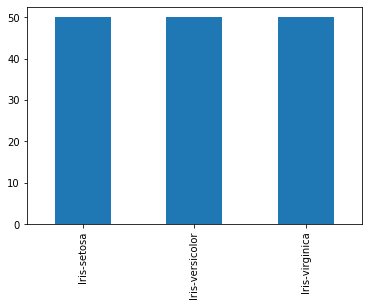

In [251]:
new_data['class'].value_counts().plot(kind='bar')

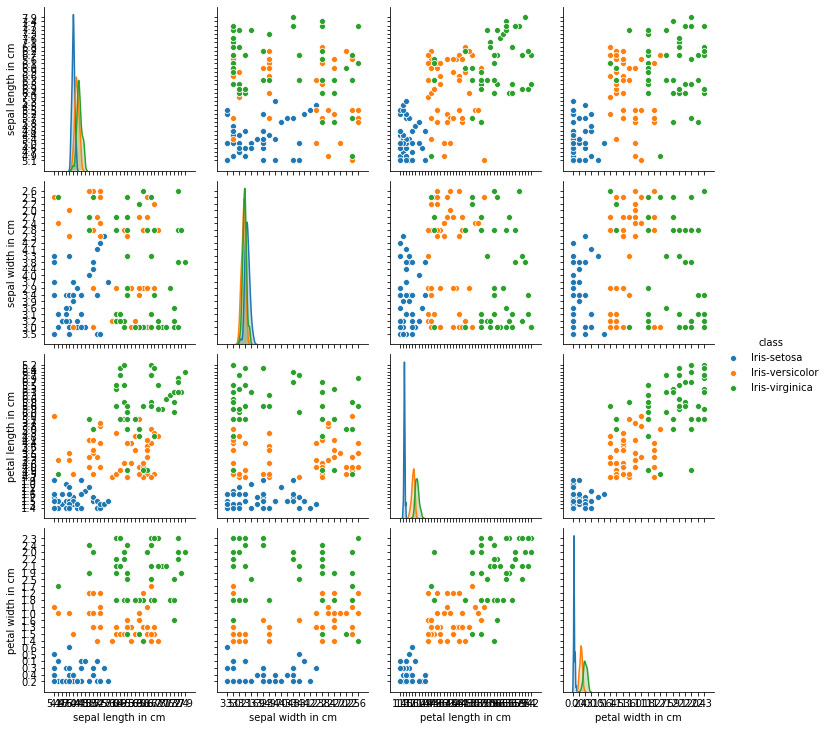

In [252]:
sns.pairplot(new_data,hue='class')

In [253]:
label_encoder=preprocessing.LabelEncoder()

In [254]:
new_data['class']= label_encoder.fit_transform(new_data['class'])

In [255]:
new_data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [256]:
x=new_data.drop('class',axis=1)

In [257]:
y=new_data['class']

In [258]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)


In [259]:
log_score=cross_val_score(LogisticRegression(random_state=9),X=x,y=y)
svm_score=cross_val_score(SVC(),X=x,y=y)
rf_score=cross_val_score(RandomForestClassifier(random_state=34),X=x,y=y)

C:\Users\hrisheekeshtc333\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hrisheekeshtc333\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

In [260]:
print(log_score)
print(svm_score)
print(rf_score)

[0.96666667 1.         0.93333333 0.96666667 1.        ]
[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [261]:
print(np.mean(log_score))
print(np.mean(svm_score))
print(np.mean(rf_score))

0.9733333333333334
0.9666666666666666
0.9666666666666668


In [221]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\hrisheekeshtc333\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [225]:
model.score(x_test,y_test)

1.0

In [223]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0,
       2, 0, 2, 1, 0, 2, 0, 2])

In [224]:
pred_table=pd.DataFrame({'target_y_values':y_test,"predicted_y_values":y_pred})
pred_table

,target_y_values,predicted_y_values
135,2,2
90,1,1
145,2,2
147,2,2
60,1,1
37,0,0
26,0,0
3,0,0
75,1,1
9,0,0


Text(0, 0.5, 'Prediction')

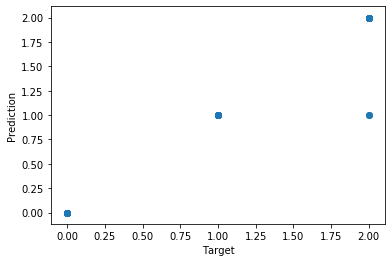

In [170]:
plt.scatter(y_test,y_pred)
plt.xlabel("Target")
plt.ylabel("Prediction")

In [171]:
cm=confusion_matrix(y_pred,y_test)

In [172]:
cm

array([[ 8,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 12]], dtype=int64)

<Figure size 3600x3600 with 0 Axes>

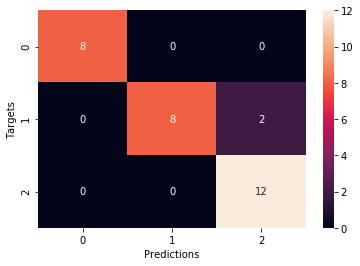

<Figure size 3600x3600 with 0 Axes>

In [173]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predictions')
plt.ylabel('Targets')
plt.figure(figsize=(50,50))